In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import sys
import os
from PIL import ImageFile
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#!unzip -uq "/content/drive/MyDrive/data/lab2/dataDogvsCat4/data/test.zip" -d "/content/drive/My Drive/data/lab2/dataDogvsCat4/test"

In [ ]:
#!unzip -uq "/content/drive/MyDrive/data/lab2/dataDogvsCat4/data/train.zip" -d "/content/drive/My Drive/data/lab2/dataDogvsCat4/train"

In [ ]:
###Clean Drive Script###
'''
fodleri_path = "/content/drive/My Drive/"
for the_file in os.listdir(fodleri_path):
  if the_file.endswith(".jpg"):
    os.remove(os.path.join(fodleri_path, the_file))
'''

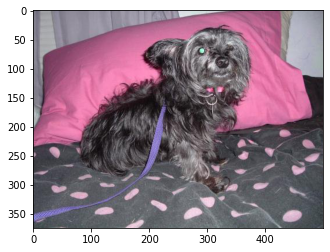

In [ ]:
'''
import keras.preprocessing.image
path = "/content/drive/My Drive/data/lab2/Dog/0.jpg"
img = tf.keras.preprocessing.image.load_img(path)
plt.imshow(img)
'''

In [ ]:
###USE NET CONFIG####
img_width, img_height = 299, 299
input_shape = (img_width, img_height,3)
tr_ratio = .05  # how aggressive will be the data augmentation/transformation
###BATCH###
batch_size = 256
###PATH###
train_path = "/content/drive/My Drive/data/lab2/dataDogvsCat4/train/train"
validation_path = "/content/drive/My Drive/data/lab2/dataDogvsCat4/test/test"
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
###XCEPTION edit N1###
base_model = Xception(input_shape=(img_width, img_height, 3),
                      weights='imagenet',
                      include_top=False)
'''
for i, layer in enumerate(base_model.layers[1:], 1):
    if i in drop_layers:
        x = layer(x)
'''

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Cat and dog
nb_classes = 2
predictions = Dense(nb_classes, activation='softmax')(x)
model = Model(base_model.input, predictions)
model.summary()

''' del base_model, predictions '''

83689472/83683744 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________

' del base_model, predictions '

In [ ]:
#

for layer in base_model.layers:
    layer.trainable = False

###USE For TRAIN imageDataGenerator
train_gen_data = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=tr_ratio,
                                   shear_range=tr_ratio,
                                   zoom_range=tr_ratio,
                                   cval=tr_ratio,
                                   horizontal_flip=True,
                                   vertical_flip=True)

### USE For TEST imageDataGenerator
test_data_gen = ImageDataGenerator(rescale=1. / 255)

os.makedirs(os.path.join(os.path.abspath(train_path), '../preview'), exist_ok=True)

###TrainGen
train_generator = train_gen_data.flow_from_directory(train_path,
                                                    target_size=(img_width,
                                                                 img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
#TestGen
test_generator = test_data_gen.flow_from_directory(validation_path,
                                                              target_size=(img_width,
                                                                           img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 2002 images belonging to 2 classes.
Found 1092 images belonging to 2 classes.


In [ ]:
###CALLBACK'S
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks_list = [
    EarlyStopping(monitor='accuracy',
                  patience=4,
                  verbose=0)
]

In [ ]:
###Compile
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
###Fit
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=40,
                    validation_data=test_generator,
                    validation_steps=test_generator.n // batch_size,
                    verbose=1,
                    callbacks=callbacks_list)


Epoch 1/40
7/7 [==============================] - 795s 114s/step - loss: 0.6085 - accuracy: 0.6982 - val_loss: 0.4138 - val_accuracy: 0.9590
Epoch 2/40
7/7 [==============================] - 47s 7s/step - loss: 0.4029 - accuracy: 0.9141 - val_loss: 0.2573 - val_accuracy: 0.9902
Epoch 3/40
7/7 [==============================] - 47s 7s/step - loss: 0.2885 - accuracy: 0.9387 - val_loss: 0.1748 - val_accuracy: 0.9932
Epoch 4/40
7/7 [==============================] - 45s 6s/step - loss: 0.2187 - accuracy: 0.9576 - val_loss: 0.1284 - val_accuracy: 0.9961
Epoch 5/40
7/7 [==============================] - 44s 6s/step - loss: 0.1871 - accuracy: 0.9530 - val_loss: 0.1058 - val_accuracy: 0.9951
Epoch 6/40
7/7 [==============================] - 45s 6s/step - loss: 0.1632 - accuracy: 0.9582 - val_loss: 0.0860 - val_accuracy: 0.9961
Epoch 7/40
7/7 [==============================] - 45s 6s/step - loss: 0.1547 - accuracy: 0.9559 - val_loss: 0.0715 - val_accuracy: 0.9980
Epoch 8/40
7/7 [===============

In [ ]:
#save
model.save_weights("/content/drive/MyDrive/data/lab2/model_wieghts-1.h5")
model.save("/content/drive/MyDrive/data/lab2/model_keras-1.h5")

In [ ]:
class Graph:
  def __init__(self, epochs):
    self.epochs = epochs
  def draw(self, data, data2, data_label,data2_label):
    plt.figure(figsize=(20,5))
    plt.plot(history.history[data], color = 'b', label=data_label)
    plt.plot(history.history[data2], color= 'r', label=data2_label)
    plt.legend()
    plt.show()
    plt.clf()


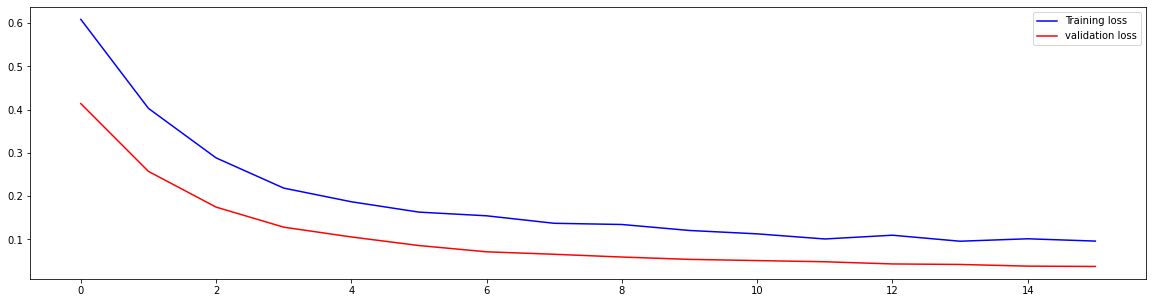

<Figure size 432x288 with 0 Axes>

In [ ]:
curve = Graph(25)
curve.draw('loss','val_loss','Training loss','validation loss')

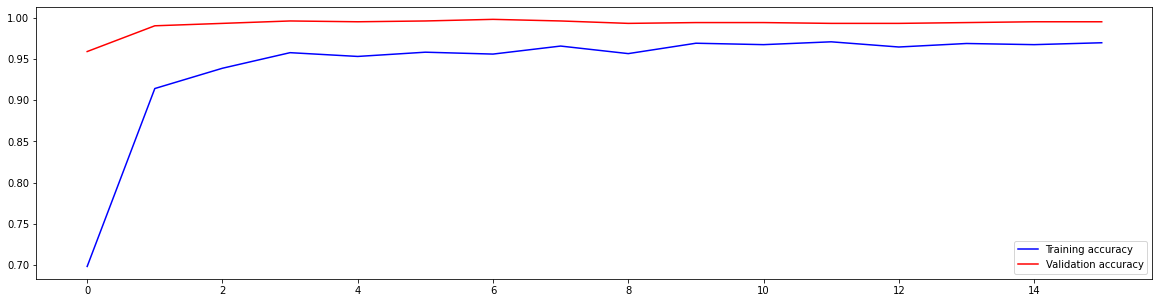

<Figure size 432x288 with 0 Axes>

In [ ]:
curve.draw('accuracy','val_accuracy',"Training accuracy","Validation accuracy")

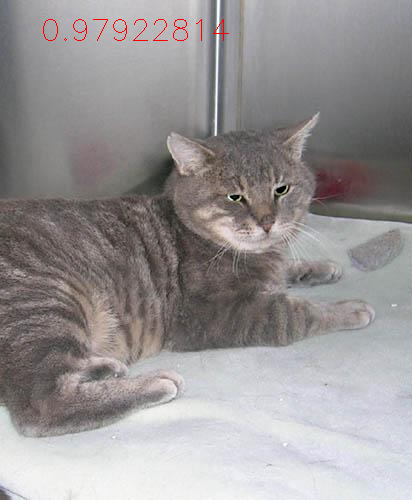

{'cat': 0.98, 'dog': 0.02} 1935.jpg


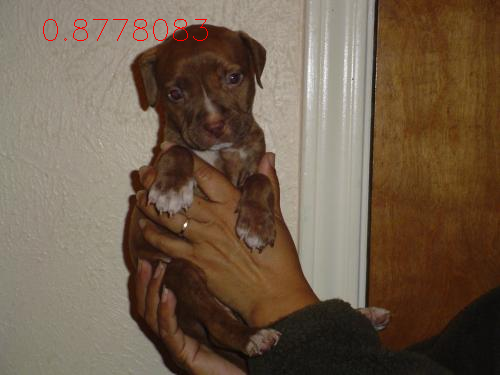

{'cat': 0.12, 'dog': 0.88} 1836.jpg


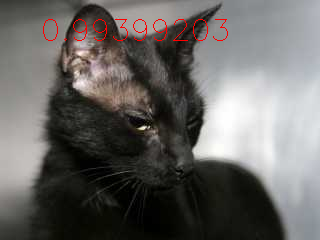

{'cat': 0.99, 'dog': 0.01} 1403.jpg


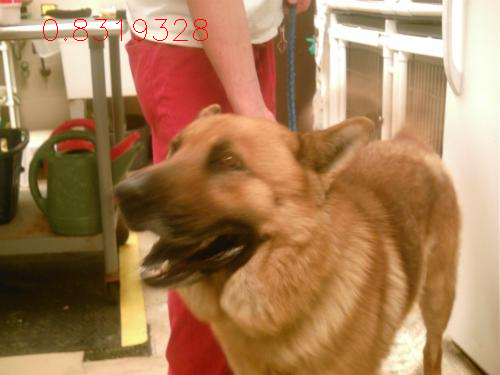

{'cat': 0.17, 'dog': 0.83} 1885.jpg


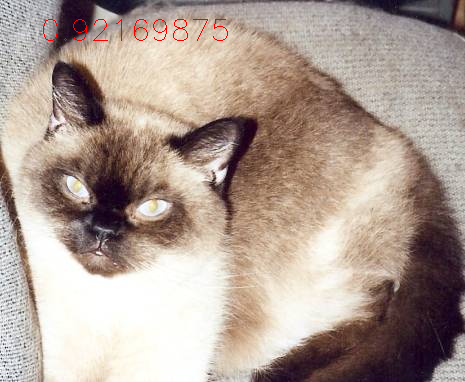

{'cat': 0.92, 'dog': 0.08} 1516.jpg


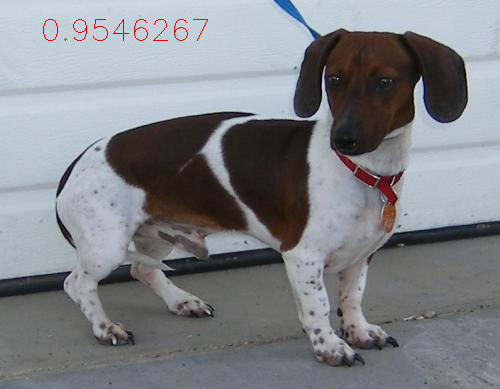

{'cat': 0.05, 'dog': 0.95} 1633.jpg


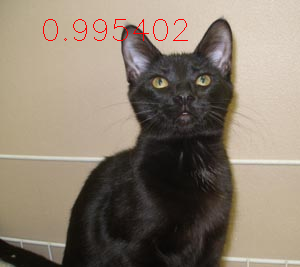

{'cat': 1.0, 'dog': 0.0} 1360.jpg


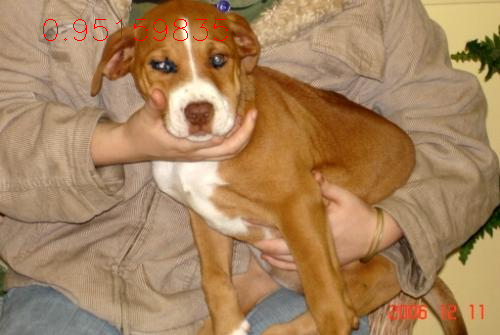

{'cat': 0.05, 'dog': 0.95} 1832.jpg


In [ ]:
###PREDICT
import random
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from google.colab.patches import cv2_imshow
import cv2
import json

image_dirs = [
              os.path.join(train_path,
                           'cat'),
              os.path.join(train_path,
                           'dog'),
]
path_to_image = [os.path.join(dir,
                              random.choice(os.listdir(dir))) for dir in image_dirs * 4]
classes = ['cat',
           'dog']

for path in path_to_image:
  out = model.predict(np.expand_dims(img_to_array(load_img(path)), axis=0) / 255.)[0]
  img = cv2.imread(path)
  cv2.putText(img, (str(max(out))), (40,40),
      cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
  cv2_imshow(img)
  print(dict(zip(classes,[round(x, 2) for x in out])), path.split('/')[-1])

### NOISE BLOCK

In [ ]:
'''
class getNoise:
  def get_normal_noise(self,image):
    noise = np.random.normal(128, 20, (image.shape[0], image.shape[1]))
    return np.dstack((noise, noise, noise)).astype(np.uint8)
  def get_uniform_noise(self,image):
    noise = np.random.uniform(0, 255, (image.shape[0], image.shape[1]))
    return np.dstack((noise, noise, noise)).astype(np.uint8)

class setNoise:
  def set_normal_noise(self,image):
    noise = normNoise().get_normal_noise(image) * 1
    noise_image = cv2.add(image.astype(np.float64), noise.astype(np.float64))
    cv2.normalize(noise_image, noise_image, 0, 255, cv2.NORM_MINMAX)
    return noise_image

  def set_uniform_noise(self,image):
    noise = Noise.get_uniform_noise(image) * 1
    noise_image = cv2.add(image.astype(np.float64), noise.astype(np.float64))
    cv2.normalize(noise_image, noise_image, 0, 255, cv2.NORM_MINMAX)
    return noise_image
'''

def get_normal_noise(image):
  noise = np.random.normal(128, 20, (image.shape[0], image.shape[1]))
  return np.dstack((noise, noise, noise)).astype(np.uint8)

def get_uniform_noise(image):
  noise = np.random.uniform(0, 255, (image.shape[0], image.shape[1]))
  return np.dstack((noise, noise, noise)).astype(np.uint8)

def set_normal_noise(image):
  noise = get_normal_noise(image)
  noise_image = cv2.add(image.astype(np.float64), noise.astype(np.float64))
  cv2.normalize(noise_image, noise_image, 0, 255, cv2.NORM_MINMAX)
  return noise_image

def set_uniform_noise(image):
  noise = get_uniform_noise(image)
  noise_image = cv2.add(image.astype(np.float64), noise.astype(np.float64))
  cv2.normalize(noise_image, noise_image, 0, 255, cv2.NORM_MINMAX)
  return noise_image




In [ ]:
###GENERATORs With Noise
gen_with_normal_noise = ImageDataGenerator(rescale=1./255,
                                           preprocessing_function=set_normal_noise).flow_from_directory(validation_path,
                                                                                                        target_size=(img_width,
                                                                                                                     img_height),
                                                                                                        batch_size=batch_size,
)
#
gen_with_uniform_noise = ImageDataGenerator(rescale=1./255,
                                            preprocessing_function=set_uniform_noise).flow_from_directory(validation_path,
                                                                                                          target_size=(img_width,
                                                                                                                       img_height),
                                                                                                          batch_size=batch_size,
)

Found 1092 images belonging to 2 classes.
Found 1092 images belonging to 2 classes.


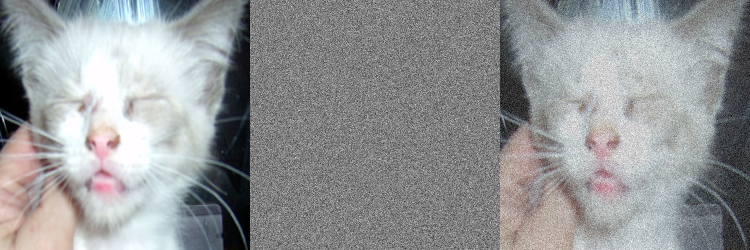

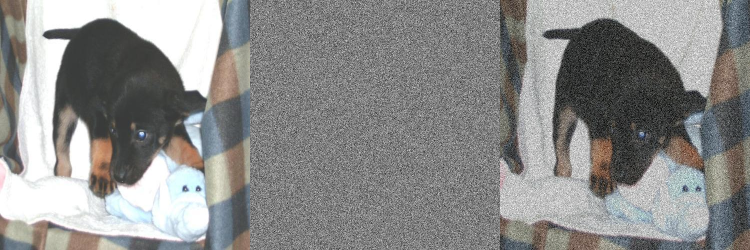

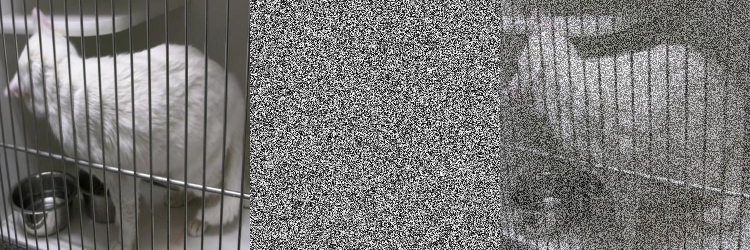

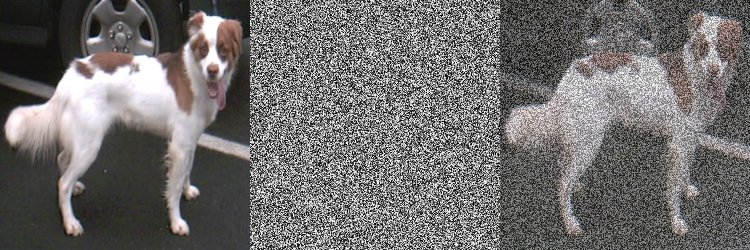

In [ ]:
###NORMAL noise cv_OUT
for i, path in zip(list(range(0, 9, 3)),[os.path.join(dir, random.choice(os.listdir(dir))) for dir in image_dirs]):
  image = cv2.resize(cv2.imread(path), (250, 250))
  cv2_imshow(np.concatenate((image, get_normal_noise(image), add_normal_noise(image)), axis=1))
###UNIFORM noise CV_OUT
for i, path in zip(list(range(0, 9, 3)),[os.path.join(dir, random.choice(os.listdir(dir))) for dir in image_dirs]):
  image = cv2.resize(cv2.imread(path), (250, 250))
  cv2_imshow(np.concatenate((image, get_uniform_noise(image), add_uniform_noise(image)), axis=1))

In [ ]:
###NORMAL
loss, accuracy = model.evaluate(gen_with_normal_noise)
###UNI
loss, accuracy = model.evaluate(gen_with_uniform_noise)

5/5 [==============================] - 8s 2s/step - loss: 0.3700 - accuracy: 0.8141
